# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.03.16

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

35848


# 0. fov parameters

In [99]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

<module 'ImageAnalysis3.spot_tools.fitting' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\fitting.py'>

In [100]:
fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304',
                            r'\\10.245.74.212\Chromatin_NAS_2\20220316-P_brain_CTP11-12-13_from_0304'],
             'save_folder':r'\\mendel\Mendel_SSD2\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304',
             'experiment_type': 'DNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [ ]:
_overwrite = False

_save_images = False

_fit_spots = True

#sel_fov_ids = np.arange(81, 168) # batch2 in mendel
sel_fov_ids = np.arange(18, 20) # batch2 in mendel

for _fov_id in sel_fov_ids:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "combo_ref_id", 0)
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    try:
        fov._save_to_file('relabeled_combo')
    except:
        pass
    setattr(fov, "relabeled_combo_ref_id", 0)
    fov._process_image_to_spots('relabeled_combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 3. unique
    setattr(fov, "unique_ref_id", 0)
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov.parallel = False
    fov._save_to_file('relabeled_unique')
    setattr(fov, "relabeled_unique_ref_id", 0)
    fov._process_image_to_spots('relabeled_unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C45_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

-- checking combo, region:[41 42 87] in 0.019s.
-- checking combo, region:[43 44 88] in 0.019s.
-- checking combo, region:[45 46 89] in 0.025s.
-- checking combo, region:[47 48 90] in 0.019s.
-- checking combo, region:[49 50 91] in 0.024s.
-- checking combo, region:[51 52 92] in 0.018s.
-- checking combo, region:[53 54 93] in 0.019s.
-- checking combo, region:[55 56 94] in 0.019s.
-- checking combo, region:[57 58 95] in 0.024s.
-- checking combo, region:[59 60 96] in 0.019s.
-- checking combo, region:[61 62 97] in 0.018s.
-- checking combo, region:[63 64 98] in 0.019s.
-- checking combo, region:[65 66 99] in 0.019s.
-- checking combo, region:[151 152 190] in 0.018s.
-- checking combo, region:[153 154 191] in 0.018s.
-- checking combo, region:[155 156 192] in 0.019s.
-- checking combo, region:[157 158 193] in 0.023s.
-- checking combo, region:[159 160 194] in 0.019s.
-- checking combo, region:[161 162 195] in 0.018s.
-- checking combo, region:[163 164] in 0.017s.
-- checking combo, regi

# Test

In [8]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=100,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )
fov._load_from_file('combo')

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

In [21]:
from ImageAnalysis3.classes.preprocess import Spots3D
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _flags = _grp['flags'][:]
    _combo_ids = _grp['ids'][:]
    _combo_spots = _grp['spots'][:]
    _combo_channels
    # assemble into Spot3D
    _bit_2_spots = {}
    for _id, _spots in zip(_combo_ids, _combo_spots):
        if len(_spots[_spots[:,0] > 0]):
            _bit_2_spots[_id] = Spots3D(_spots[_spots[:,0] > 0],
                                        bits=_id,
                                        pixel_sizes=np.array(fov.shared_parameters['distance_zxy']))

# get all coordinates in SE library

In [31]:
reload(ia.io_tools.spots)
import ImageAnalysis3.io_tools.spots

In [33]:
fov_spot_df = ia.io_tools.spots.FovCell2Spots_2_DataFrame({0:_bit_2_spots})

- Converting spots from 1 cells into DataFrame


In [86]:
se_spot_df = fov_spot_df[fov_spot_df['bit']>99]
se_spot_heights = se_spot_df['height'].values
se_spot_coords = se_spot_df[['z','x','y']].values
se_H, edges =np.histogramdd(se_spot_coords, [np.arange(0,51), np.arange(0,2049) ,np.arange(0,2049)],
                           weights=np.log(se_spot_heights+1))

In [87]:
gn_spot_df = fov_spot_df[fov_spot_df['bit']<=99]
gn_spot_heights = gn_spot_df['height'].values
gn_spot_coords = gn_spot_df[['z','x','y']].values
gn_H, edges =np.histogramdd(gn_spot_coords, [np.arange(0,51), np.arange(0,2049) ,np.arange(0,2049)],
                           weights=np.log(gn_spot_heights+1))

<IPython.core.display.Javascript object>


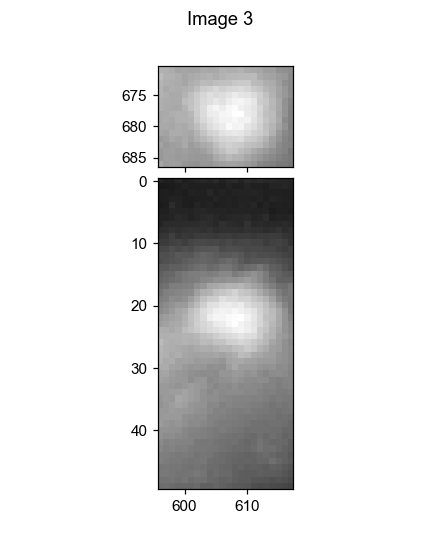

In [98]:
ia.visual_tools.imshow_mark_3d_v2([gn_H, se_H, fov.dapi_im])

In [88]:
gn_vs, gn_dapi = gn_H[gn_H>0], fov.dapi_im[gn_H>0]

<IPython.core.display.Javascript object>


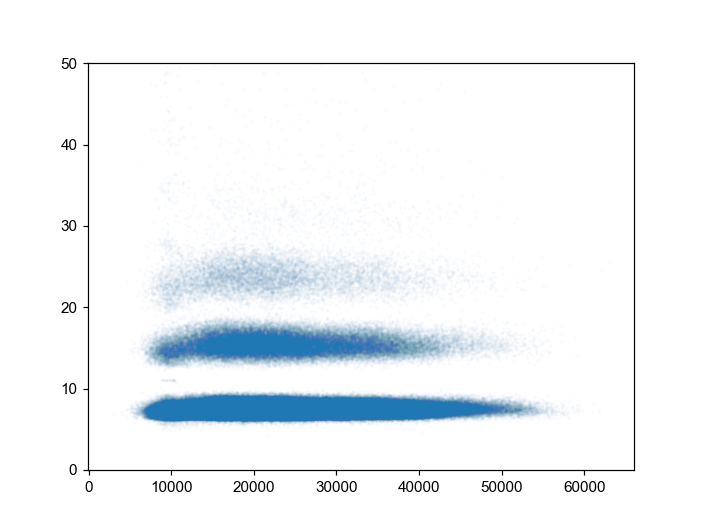

In [96]:
plt.figure()
plt.scatter(gn_dapi, gn_vs, s=2, alpha=0.01)
plt.ylim([0,50])
plt.show()

In [90]:
se_vs, se_dapi = se_H[se_H>0], fov.dapi_im[se_H>0]

<IPython.core.display.Javascript object>


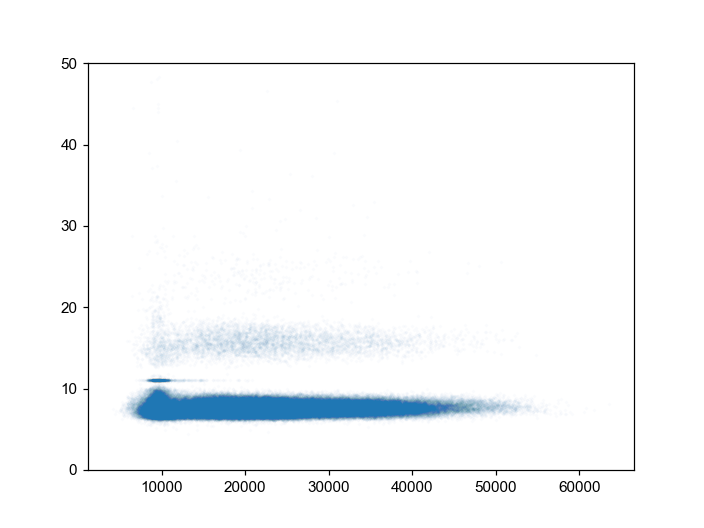

In [97]:
plt.figure()
plt.scatter(se_dapi, se_vs, s=2, alpha=0.01)
plt.ylim([0,50])
plt.show()

In [84]:
gn_spot_heights.shape, se_spot_heights.shape

((595277,), (161750,))

In [ ]:
z